In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [250]:
data = pd.read_csv('/Users/edwardamoah/Downloads/Nesting_data.csv')

In [251]:
data['site'] = data['Frame_ID'].str[0]

In [252]:
data.groupby('site').size()

site
M    231
N     83
dtype: int64

In [253]:
data.groupby(['Release', 'site']).size()

Release  site
1        M        59
         N        52
2        M       172
         N        31
dtype: int64

In [254]:
data.groupby(['site', 'Release']).size()

site  Release
M     1           59
      2          172
N     1           52
      2           31
dtype: int64

In [255]:
data['Nest_ID'] = data.apply(lambda x: "-".join(x['Cell_ID'].split('-')[:-1]), axis=1)

In [256]:
data.query(" Release == 1 and site == 'N' ").groupby('Nest_ID').size()


Nest_ID
I-A       7
I-B       1
I-C       1
I-E       1
I-F       2
I-G       2
I-I       1
II-A     15
II-B      1
II-C      3
II-D      4
II-E      3
II-F      3
II-G      2
II-H      1
II-I      1
III-A     2
III-D     1
III-E     1
dtype: int64

In [257]:
def getNestID(x, f):
    string1 =  "-".join(x.split('-')[:-1])
    string2 = f[-1]
    return f"{string2}-{string1}"

In [258]:
data['Nest_ID']=data.apply(lambda x: getNestID(x['Cell_ID'], x['Frame_ID']), axis=1)

In [259]:
np.mean(data.query(" Release == 1 and site == 'N' ").groupby('Nest_ID').size().tolist())


2.260869565217391

In [260]:
np.mean(data.query(" Release == 2 and site == 'N' ").groupby('Nest_ID').size().tolist())


2.2142857142857144

In [261]:
np.mean(data.query(" Release == 1 and site == 'M' ").groupby('Nest_ID').size().tolist())


3.1052631578947367

In [263]:
np.mean(data.query(" Release == 2 and site == 'M' ").groupby('Nest_ID').size().tolist())


4.3

In [269]:
np.mean(data.query(" Release == 1").groupby('Nest_ID').size().tolist())


3.264705882352941

In [270]:
np.mean(data.query(" Release == 2 ").groupby('Nest_ID').size().tolist())


4.229166666666667

T-statistic: -1.2999548809338344
P-value: 0.19884883643874954


([<matplotlib.axis.XTick at 0x28e8db830>,
 [Text(0, 0, '04-19-2024'), Text(1, 0, '05-18-2024')])

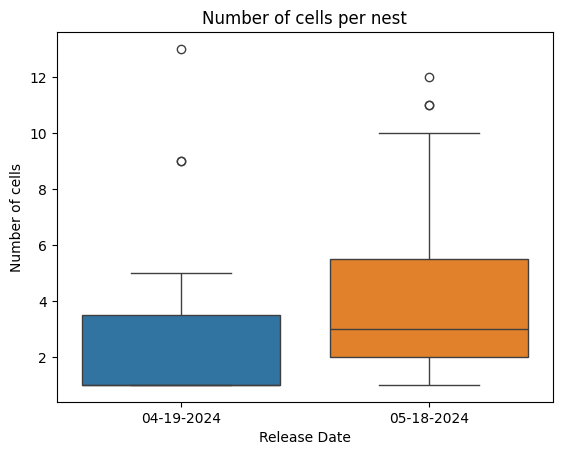

In [268]:
vals1 = data.query(" Release == 1 and site == 'M' ").groupby('Nest_ID').size().tolist()
vals2 = data.query(" Release == 2 and site == 'M' ").groupby('Nest_ID').size().tolist()
sns.boxplot(data=[vals1, vals2])

t_statistic, p_value = stats.ttest_ind(vals1, vals2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

plt.title("Number of cells per nest")
plt.ylabel("Number of cells")
plt.xlabel("Release Date")
plt.xticks([0, 1], ['04-19-2024', '05-18-2024'])

T-statistic: 0.06451820496977771
P-value: 0.9489247092455375


([<matplotlib.axis.XTick at 0x28e8d9280>,
 [Text(0, 0, '04-19-2024'), Text(1, 0, '05-18-2024')])

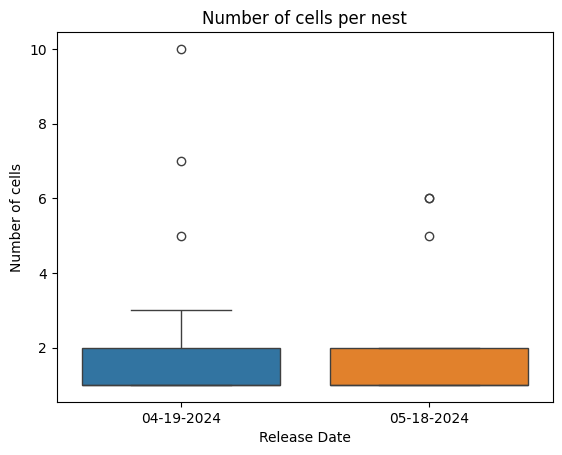

In [267]:
vals1 = data.query(" Release == 1 and site == 'N' ").groupby('Nest_ID').size().tolist()
vals2 = data.query(" Release == 2 and site == 'N' ").groupby('Nest_ID').size().tolist()
sns.boxplot(data=[vals1, vals2])

t_statistic, p_value = stats.ttest_ind(vals1, vals2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

plt.title("Number of cells per nest")
plt.ylabel("Number of cells")
plt.xlabel("Release Date")
plt.xticks([0, 1], ['04-19-2024', '05-18-2024'])

T-statistic: -1.2571598066870222
P-value: 0.2123536652131194


Text(1.3, 6, 'A')

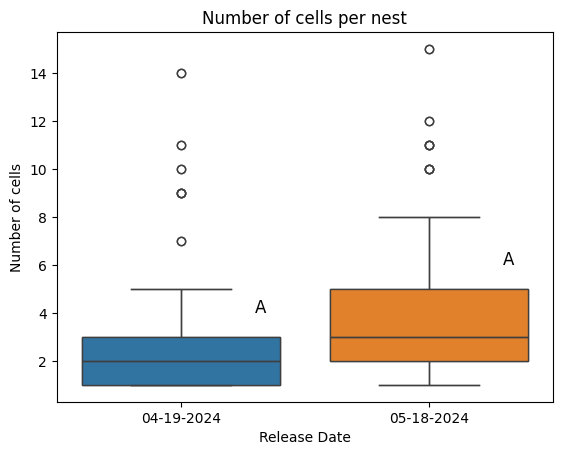

In [266]:
from scipy import stats
vals1 = data.query(" Release == 1  ").groupby('Nest_ID').size().tolist()
vals2 = data.query(" Release == 2  ").groupby('Nest_ID').size().tolist()
sns.boxplot(data=[vals1, vals2])

plt.title("Number of cells per nest")
plt.ylabel("Number of cells")
plt.xlabel("Release Date")
plt.xticks([0, 1], ['04-19-2024', '05-18-2024'])

vals1 = data.query(" Release == 1 ").groupby('Nest_ID').size().tolist()
vals2 = data.query(" Release == 2 ").groupby('Nest_ID').size().tolist()

sns.boxplot(data=[vals1, vals2])

t_statistic, p_value = stats.ttest_ind(vals1, vals2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

plt.text(0.3, 4, 'A', fontsize=12)

plt.text(1.3, 6, 'A', fontsize=12)

Text(0.5, 1.0, 'Number of Nested Holes per Release Date')

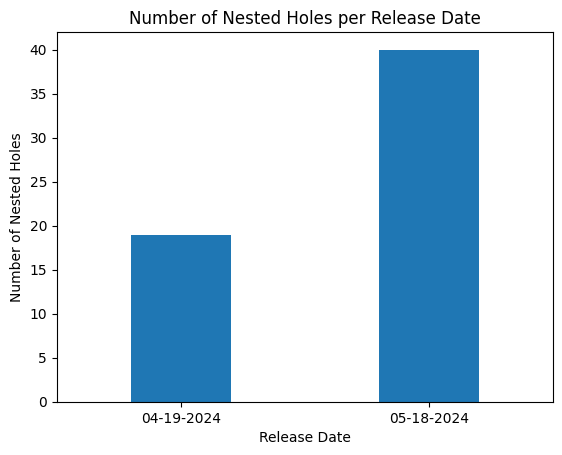

In [272]:
plt.bar([1,3],[len(vals1), len(vals2)])
plt.xticks([1, 3], ['04-19-2024', '05-18-2024'])
plt.xlim(0, 4)
plt.ylabel("Number of Nested Holes")
plt.xlabel("Release Date")
plt.title("Number of Nested Holes per Release Date")

In [273]:
def filterData(provision):
    return 'L' in provision

data1 = data[data['Provision'].apply(filterData)]

Text(0.5, 0, 'Release Date')

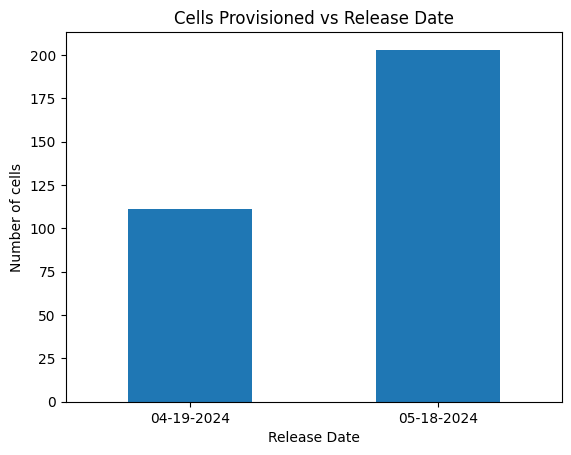

In [275]:
data.groupby(['Release']).size().plot(kind='bar')
plt.title('Cells Provisioned vs Release Date')
plt.xticks([0,1],["04-19-2024", "05-18-2024"])
plt.ylabel('Number of cells')
plt.xticks(rotation=0)
plt.xlabel('Release Date')

<Axes: xlabel='Release,site'>

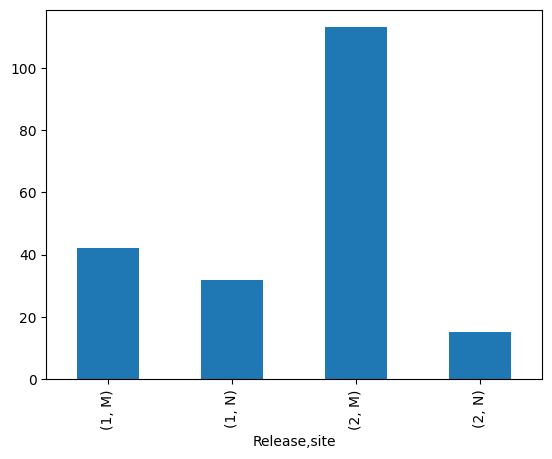

In [276]:
data1.groupby(['Release','site']).size().plot(kind='bar')

In [277]:
np.mean(data1.query(" Release == 1").groupby('Nest_ID').size().tolist())


3.5238095238095237

In [278]:
np.mean(data1.query(" Release == 2").groupby('Nest_ID').size().tolist())


3.657142857142857

In [280]:
np.mean(data1.query(" Release == 1 and site == 'M' ").groupby('Nest_ID').size().tolist())

3.5

In [281]:
np.mean(data1.query(" Release == 2 and site == 'M' ").groupby('Nest_ID').size().tolist())

3.7666666666666666

In [282]:
np.mean(data1.query(" Release == 1 and site == 'N' ").groupby('Nest_ID').size().tolist())

2.6666666666666665

In [284]:
np.mean(data1.query(" Release == 2 and site == 'N' ").groupby('Nest_ID').size().tolist())

2.142857142857143

T-statistic: 0.4646274634050629
P-value: 0.6480935848054257


([<matplotlib.axis.XTick at 0x28ec16a50>,
 [Text(0, 0, '04-19-2024'), Text(1, 0, '05-18-2024')])

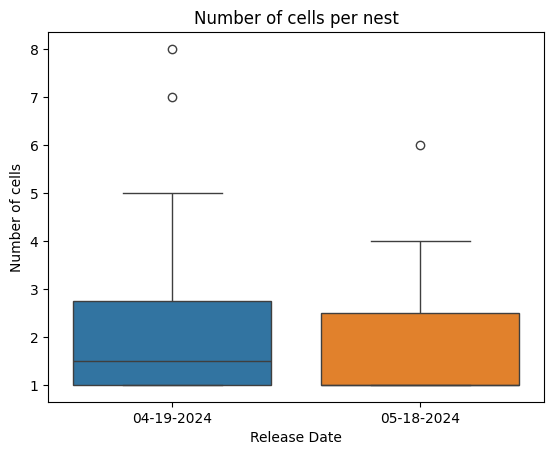

In [285]:
vals1 = data1.query(" Release == 1 and site == 'N' ").groupby('Nest_ID').size().tolist()
vals2 = data1.query(" Release == 2 and site == 'N' ").groupby('Nest_ID').size().tolist()
sns.boxplot(data=[vals1, vals2])

t_statistic, p_value = stats.ttest_ind(vals1, vals2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

plt.title("Number of cells per nest")
plt.ylabel("Number of cells")
plt.xlabel("Release Date")
plt.xticks([0, 1], ['04-19-2024', '05-18-2024'])

T-statistic: -0.24025947017408428
P-value: 0.8113562118160874


([<matplotlib.axis.XTick at 0x28ec2b0e0>,
 [Text(0, 0, '04-19-2024'), Text(1, 0, '05-18-2024')])

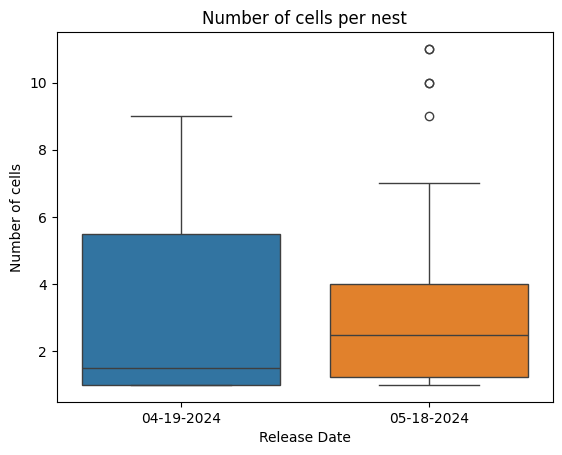

In [286]:
vals1 = data1.query(" Release == 1 and site == 'M' ").groupby('Nest_ID').size().tolist()
vals2 = data1.query(" Release == 2 and site == 'M' ").groupby('Nest_ID').size().tolist()
sns.boxplot(data=[vals1, vals2])

t_statistic, p_value = stats.ttest_ind(vals1, vals2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

plt.title("Number of cells per nest")
plt.ylabel("Number of cells")
plt.xlabel("Release Date")
plt.xticks([0, 1], ['04-19-2024', '05-18-2024'])

In [148]:
################# weather data ################

In [233]:
data = pd.read_csv('/Users/edwardamoah/Downloads/PRISM_ppt_tmean_provisional_4km_20240401_20240630 (1).csv')

In [234]:
data['date'] = pd.to_datetime(data['Date'])

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_24633/2616432062.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['Date'])


In [287]:
import datetime

In [288]:
def getPeriod(date):
    date1 = pd.to_datetime('2024-04-19')
    date2 = pd.to_datetime('2024-05-18')

    if date < date2 and date >= date1:
        return 1
    else:
        return 2



In [ ]:
data['period'] = data['date'].apply(getPeriod)

In [240]:
data.groupby('period').size()

period
1    58
2    42
dtype: int64

In [ ]:
from scipy import stats
vals1 = data.query(" Release == 1  ").groupby('Nest_ID').size().tolist()
vals2 = data.query(" Release == 2  ").groupby('Nest_ID').size().tolist()
sns.boxplot(data=[vals1, vals2])

plt.title("Average number of cells per nest (n=2)")
plt.ylabel("Number of cells")
plt.xlabel("Release Date")
plt.xticks([0, 1], ['04-19-2024', '05-18-2024'])

vals1 = data.query(" Release == 1 ").groupby('Nest_ID').size().tolist()
vals2 = data.query(" Release == 2 ").groupby('Nest_ID').size().tolist()

sns.boxplot(data=[vals1, vals2])

t_statistic, p_value = stats.ttest_ind(vals1, vals2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

plt.text(0.3, 4, 'A', fontsize=12)

plt.text(1.3, 6, 'A', fontsize=12)


Text(1.3, 23, 'B')

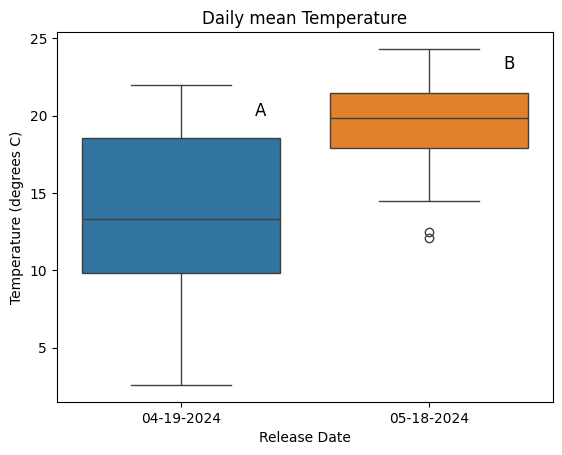

In [245]:
vals1 = data.query(" period == 1")['tmean (degrees C)'].tolist()
vals2 = data.query(" period == 2")['tmean (degrees C)'].tolist()
sns.boxplot(data=[vals1, vals2])
plt.title("Daily mean Temperature")
plt.ylabel("Temperature (degrees C)")
plt.xlabel("Release Date")
plt.xticks([0, 1], ['04-19-2024', '05-18-2024'])

plt.text(0.3, 20, 'A', fontsize=12)

plt.text(1.3, 23, 'B', fontsize=12)

In [246]:
t_statistic, p_value = stats.ttest_ind(vals1, vals2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -6.607048495925415
P-value: 2.049089463468213e-09


Text(1.3, 5.5, 'A')

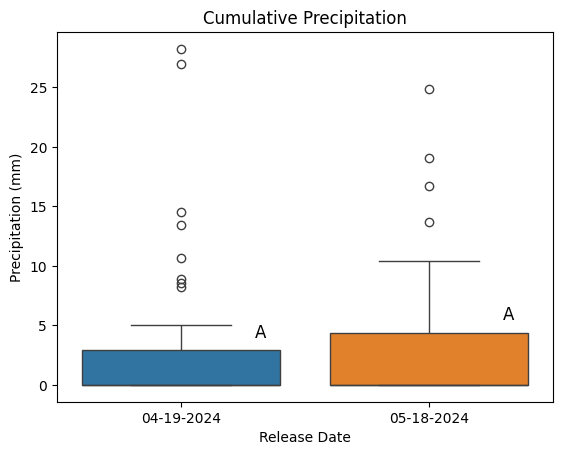

In [247]:
vals1 = data.query(" period == 1")['ppt (mm)'].tolist()
vals2 = data.query(" period == 2")['ppt (mm)'].tolist()
sns.boxplot(data=[vals1, vals2])
plt.title("Cumulative Precipitation")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Release Date")
plt.xticks([0, 1], ['04-19-2024', '05-18-2024'])

plt.text(0.3, 4, 'A', fontsize=12)

plt.text(1.3, 5.5, 'A', fontsize=12)

In [248]:
t_statistic, p_value = stats.ttest_ind(vals1, vals2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.3920728182204904
P-value: 0.6958557583839942


In [179]:
[x for x in vals1 if x > 2]

[3.98,
 2.87,
 2.97,
 8.88,
 2.83,
 2.48,
 26.97,
 13.44,
 8.53,
 5.03,
 4.59,
 2.17,
 2.21,
 3.4,
 10.64,
 2.1,
 3.59,
 28.23,
 14.5,
 8.25,
 4.52]

In [180]:
data

[19.03, 7.68, 6.61, 7.87, 16.74, 5.18, 24.86, 10.45, 10.24, 13.68, 8.95]

In [189]:
def getForagingdays(ppt, tmean):
    if ppt < 5 and tmean > 13.9:
        return 1
    return 0

In [190]:
data['foraging_days'] = data.apply(lambda x: getForagingdays(x['ppt (mm)'], x['tmean (degrees C)']), axis=1)

In [197]:
data[['period','foraging_days']].groupby(['period']).sum()

,foraging_days
period,
1,26
2,29
